In [1]:
import pandas as pd
import numpy as np
import os
import random
import shutil  
import urllib.request
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
import zipfile
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
url = "http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip"
urllib.request.urlretrieve(url, 'dataset.zip')

('dataset.zip', <http.client.HTTPMessage at 0x1a30ce1d68>)

In [6]:
with zipfile.ZipFile("dataset.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [10]:
train_path ='data/UCMerced_LandUse/Images'
os.mkdir('data/UCMerced_LandUse/test')
os.mkdir('data/UCMerced_LandUse/validation')
validation_path = 'data/UCMerced_LandUse/validation'
test_path  = 'data/UCMerced_LandUse/test'

In [11]:
train_folders = os.listdir(train_path)
validation_folders = os.listdir(validation_path)
test_folders = os.listdir(test_path)

In [12]:
for folder in train_folders:
    if folder != ".DS_Store":
        current_path = os.path.join(train_path,folder)
        files = os.listdir(current_path)
        files_to_move = files[-15:]
        v_destination = (os.path.join(validation_path, folder))
        t_destination = (os.path.join(test_path, folder))

        file_counter = 0
        for file in files_to_move:
            if file_counter <= 10:
              source = os.path.join(current_path,file)
              print(source)
              if os.path.exists(v_destination):
                dest = shutil.copy(source, v_destination)
                os.remove(source)
                print(source, "moved to" , v_destination)
                file_counter = file_counter + 1
              else:
                os.mkdir(v_destination)
                dest = shutil.copy(source, v_destination)
                os.remove(source)
                print(source, "moved to" , v_destination)
                file_counter = file_counter + 1
            else:
              source = os.path.join(current_path,file)
              print(source)
              if os.path.exists(t_destination):
                dest = shutil.copy(source, t_destination)
                os.remove(source)
                print(source, "moved to" , t_destination)
                file_counter = file_counter + 1
              else:
                os.mkdir(t_destination)
                dest = shutil.copy(source, t_destination)
                os.remove(source)
                print(source, "moved to" , t_destination)
                file_counter = file_counter + 1

data/UCMerced_LandUse/Images/forest/forest31.tif
data/UCMerced_LandUse/Images/forest/forest31.tif moved to data/UCMerced_LandUse/validation/forest
data/UCMerced_LandUse/Images/forest/forest27.tif
data/UCMerced_LandUse/Images/forest/forest27.tif moved to data/UCMerced_LandUse/validation/forest
data/UCMerced_LandUse/Images/forest/forest33.tif
data/UCMerced_LandUse/Images/forest/forest33.tif moved to data/UCMerced_LandUse/validation/forest
data/UCMerced_LandUse/Images/forest/forest32.tif
data/UCMerced_LandUse/Images/forest/forest32.tif moved to data/UCMerced_LandUse/validation/forest
data/UCMerced_LandUse/Images/forest/forest26.tif
data/UCMerced_LandUse/Images/forest/forest26.tif moved to data/UCMerced_LandUse/validation/forest
data/UCMerced_LandUse/Images/forest/forest22.tif
data/UCMerced_LandUse/Images/forest/forest22.tif moved to data/UCMerced_LandUse/validation/forest
data/UCMerced_LandUse/Images/forest/forest36.tif
data/UCMerced_LandUse/Images/forest/forest36.tif moved to data/UCMerc

data/UCMerced_LandUse/Images/agricultural/agricultural62.tif moved to data/UCMerced_LandUse/validation/agricultural
data/UCMerced_LandUse/Images/agricultural/agricultural76.tif
data/UCMerced_LandUse/Images/agricultural/agricultural76.tif moved to data/UCMerced_LandUse/validation/agricultural
data/UCMerced_LandUse/Images/agricultural/agricultural89.tif
data/UCMerced_LandUse/Images/agricultural/agricultural89.tif moved to data/UCMerced_LandUse/validation/agricultural
data/UCMerced_LandUse/Images/agricultural/agricultural88.tif
data/UCMerced_LandUse/Images/agricultural/agricultural88.tif moved to data/UCMerced_LandUse/validation/agricultural
data/UCMerced_LandUse/Images/agricultural/agricultural77.tif
data/UCMerced_LandUse/Images/agricultural/agricultural77.tif moved to data/UCMerced_LandUse/validation/agricultural
data/UCMerced_LandUse/Images/agricultural/agricultural63.tif
data/UCMerced_LandUse/Images/agricultural/agricultural63.tif moved to data/UCMerced_LandUse/validation/agricultural

data/UCMerced_LandUse/Images/tenniscourt/tenniscourt25.tif moved to data/UCMerced_LandUse/validation/tenniscourt
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt31.tif
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt31.tif moved to data/UCMerced_LandUse/test/tenniscourt
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt30.tif
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt30.tif moved to data/UCMerced_LandUse/test/tenniscourt
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt24.tif
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt24.tif moved to data/UCMerced_LandUse/test/tenniscourt
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt18.tif
data/UCMerced_LandUse/Images/tenniscourt/tenniscourt18.tif moved to data/UCMerced_LandUse/test/tenniscourt
data/UCMerced_LandUse/Images/intersection/intersection05.tif
data/UCMerced_LandUse/Images/intersection/intersection05.tif moved to data/UCMerced_LandUse/validation/intersection
data/UCMerced_LandUse/Images/intersection/inte

data/UCMerced_LandUse/Images/beach/beach97.tif moved to data/UCMerced_LandUse/validation/beach
data/UCMerced_LandUse/Images/beach/beach83.tif
data/UCMerced_LandUse/Images/beach/beach83.tif moved to data/UCMerced_LandUse/validation/beach
data/UCMerced_LandUse/Images/beach/beach68.tif
data/UCMerced_LandUse/Images/beach/beach68.tif moved to data/UCMerced_LandUse/validation/beach
data/UCMerced_LandUse/Images/beach/beach54.tif
data/UCMerced_LandUse/Images/beach/beach54.tif moved to data/UCMerced_LandUse/validation/beach
data/UCMerced_LandUse/Images/beach/beach40.tif
data/UCMerced_LandUse/Images/beach/beach40.tif moved to data/UCMerced_LandUse/validation/beach
data/UCMerced_LandUse/Images/beach/beach56.tif
data/UCMerced_LandUse/Images/beach/beach56.tif moved to data/UCMerced_LandUse/validation/beach
data/UCMerced_LandUse/Images/beach/beach42.tif
data/UCMerced_LandUse/Images/beach/beach42.tif moved to data/UCMerced_LandUse/validation/beach
data/UCMerced_LandUse/Images/beach/beach95.tif
data/U

In [14]:
# Path to the train folder
original_test = 'data/UCMerced_LandUse/test'
categories = os.listdir(original_test)
files_list = []
categories_list = []

In [15]:
for category in categories:
   category_path = os.path.join(original_test,category)

   files = os.listdir(category_path)
   for file_name in files:
     files_list.append(str(category) + "/" + file_name)
     categories_list.append(category)

In [16]:
print(len(files_list))
print(len(categories_list))

84
84


In [17]:
data_test = pd.DataFrame({'filename':files_list,'label':categories_list})
data_test.to_csv("original_test.csv",index=False)

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(directory=r"data/UCMerced_LandUse/Images",
                                                    target_size=(70, 70), color_mode="rgb",batch_size=32,
                                                    class_mode="categorical", shuffle=True,seed=42)

Found 1785 images belonging to 21 classes.


In [24]:
valid_generator = test_datagen.flow_from_directory(directory=r"data/UCMerced_LandUse/validation",
                                                   target_size=(70, 70), color_mode="rgb", batch_size=32,
                                                   class_mode="categorical", shuffle=True, seed=42)

Found 231 images belonging to 21 classes.


In [26]:
test_generator = test_datagen.flow_from_directory(directory="data/UCMerced_LandUse/test", 
                                                  target_size=(70, 70), color_mode="rgb", batch_size=1,
                                                  class_mode=None, shuffle=False, seed=42)

Found 84 images belonging to 21 classes.


In [27]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [28]:
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
__________

In [31]:
model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID, epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
55/55 [==============================] - 19s 344ms/step - loss: 2.9993 - acc: 0.0466 - val_loss: 2.8420 - val_acc: 0.1027
Epoch 2/25
55/55 [==============================] - 17s 315ms/step - loss: 2.8533 - acc: 0.1137 - val_loss: 2.7233 - val_acc: 0.1357
Epoch 3/25
55/55 [==============================] - 17s 315ms/step - loss: 2.6187 - acc: 0.1716 - val_loss: 2.6511 - val_acc: 0.1759
Epoch 4/25
55/55 [==============================] - 17s 317ms/step - loss: 2.4472 - acc: 0.2046 - val_loss: 2.2981 - val_acc: 0.2362
Epoch 5/25
55/55 [==============================] - 17s 316ms/step - loss: 2.2896 - acc: 0.2734 - val_loss: 2.4309 - val_acc: 0.2312
Epoch 6/25
55/55 [==============================] - 16s 288ms/step - loss: 2.1502 - acc: 0.2979 - val_loss: 1.9999 - val_acc: 0.3568
Epoch 7/25
55/55 [==============================] - 16s 285ms/step - loss: 2.0702 - acc: 0.3342 - val_loss: 2.1442 - val_acc: 0.3266
Epoch 8/25
55/55 [===

In [32]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

84/84 [==============================] - 1s 8ms/step


In [33]:
predicted_class_indices = []
for i in pred:
        predicted_class_indices.append(np.argmax(np.asarray(i)))

In [34]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [35]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames, "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [36]:
final_pred_df = pd.DataFrame(columns = ["filename", "label","pred"])
filename_list = []
label_list = []
pred_list = []

In [37]:
for filename in results["Filename"]:
  filename_list.append(filename)
  label_list.append(data_test[data_test["filename"] == filename]["label"].values[0])
  pred_list.append(results[results["Filename"] == filename]["Predictions"].values[0])

In [38]:
final_pred_df["filename"] = filename_list
final_pred_df["label"] = label_list
final_pred_df["pred"] = pred_list
final_pred_df.to_csv("final.csv")

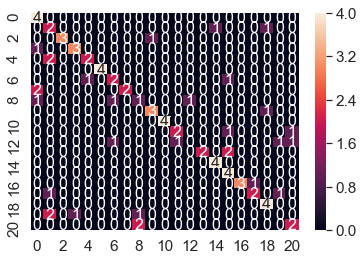

In [39]:
cm=confusion_matrix(final_pred_df['label'],final_pred_df['pred'])
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show()